# Data Overview

In [1]:
import pandas as pd

# Read the CSV file into a Pandas dataframe
df = pd.read_csv('athletedatabase.csv')

# Loop over each column in the dataframe
for column in df.columns:
    # Count the number of unique values in the column
    unique_count = df[column].nunique()
    null_count = df[column].isnull().sum()
    none_count = df[column].apply(lambda x: x.lower() if isinstance(x, str) else x).isin(['none']).sum()
    
    # Print the column name and unique count
    print(f"{column}: {unique_count} unique values")
    print(f"{column}: {null_count} null values")
    print(f"{column}: {none_count} none values")


C:\Users\brady\AppData\Local\Temp\ipykernel_65316\2690452005.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('athletedatabase.csv')


FullName: 34310 unique values
FullName: 0 null values
FullName: 0 none values
CollegeYear: 148 unique values
CollegeYear: 1162 null values
CollegeYear: 0 none values
BirthDay: 21324 unique values
BirthDay: 1162 null values
BirthDay: 0 none values
BirthPlace: 7643 unique values
BirthPlace: 1444 null values
BirthPlace: 0 none values
bp_lon: 0 unique values
bp_lon: 37273 null values
bp_lon: 0 none values
bp_lat: 0 unique values
bp_lat: 37273 null values
bp_lat: 0 none values
bp_population: 0 unique values
bp_population: 37273 null values
bp_population: 0 none values
BirthState: 52 unique values
BirthState: 2623 null values
BirthState: 0 none values
HighSchool: 11580 unique values
HighSchool: 9359 null values
HighSchool: 0 none values
League: 3 unique values
League: 0 null values
League: 0 none values
College: 1461 unique values
College: 902 null values
College: 0 none values
College2: 157 unique values
College2: 36995 null values
College2: 0 none values
College3: 14 unique values
College3

In [2]:
import pandas as pd
#Brady Monks
# Load the dataset into a pandas dataframe
df = pd.read_csv("AthleteDatabase.csv")
# Create an empty dictionary to store the top 10 values for each column
top_10_dict = {}
# Loop through each column in the dataframe
for col in df.columns:
    # Check if the column is categorical
    if df[col].dtype == 'object':
        # Get the value counts for the column
        value_counts = df[col].value_counts()
        # Get the top 10 values and append NaN if there are less than 10 unique values
        top_10 = list(value_counts.index[:10]) + [float('nan')] * (10 - len(value_counts))
        # Add the top 10 values to the dictionary
        top_10_dict[col] = top_10
# Create a new dataframe from the dictionary
top_10_df = pd.DataFrame(top_10_dict)
# Print the new dataframe
print(top_10_df)


          FullName    BirthDay        BirthPlace BirthState  \
0    Mike Williams   7/24/1979       Chicago, IL         CA   
1      Ron Johnson   1/22/1964   Los Angeles, CA         TX   
2       Dave Smith   3/14/1964       Houston, TX         PA   
3      Chris Jones   6/12/1979       Detroit, MI         OH   
4   Kevin Williams    9/8/1990  Philadelphia, PA         FL   
5       Mike Smith   12/3/1964         Miami, FL         IL   
6  Charles Johnson    5/6/1986        Dallas, TX         NY   
7      Larry Brown   10/4/1960      New York, NY         GA   
8    Chris Johnson  11/29/1956     Cleveland, OH         LA   
9      Chris Smith  12/17/1976   New Orleans, LA         MI   

                   HighSchool League                               College  \
0  Long Beach Polytechnic, CA    NFL              University of Notre Dame   
1                   South, OH    MLB     University of Southern California   
2         Abraham Lincoln, CA    NBA                 Ohio State Universi

C:\Users\brady\AppData\Local\Temp\ipykernel_65316\4143519540.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


# Exploratory Data Analysis

## Distribution of Athletes by League

C:\Users\brady\AppData\Local\Temp\ipykernel_65316\2272378089.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


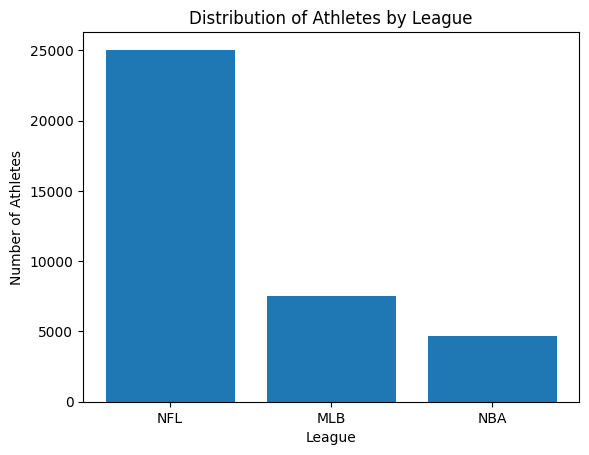

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
df = pd.read_csv("AthleteDatabase.csv")

# Count the number of athletes in each league
league_counts = df['League'].value_counts()

# Create a bar chart of the league counts
plt.bar(league_counts.index, league_counts.values)
plt.title("Distribution of Athletes by League")
plt.xlabel("League")
plt.ylabel("Number of Athletes")
plt.show()

## Distribution of Athletes by College (Top 10)

C:\Users\brady\AppData\Local\Temp\ipykernel_65316\3374706186.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


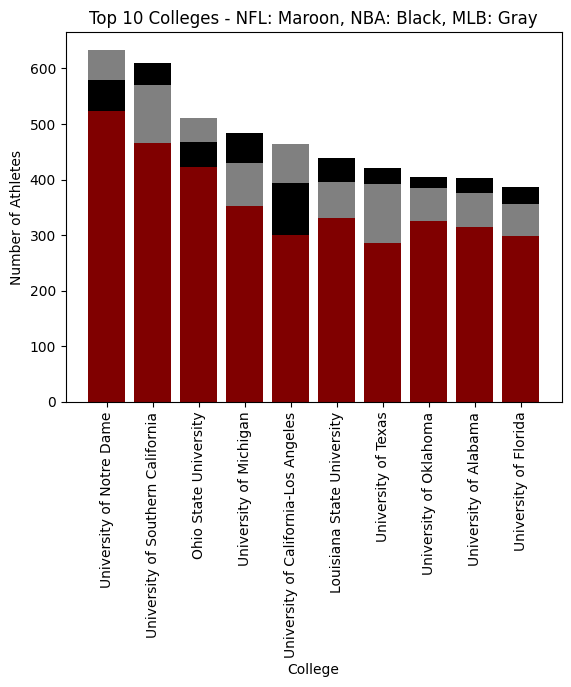

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
df = pd.read_csv("AthleteDatabase.csv")

# Count the number of athletes from each college (excluding "none")
college_counts = df[df['College'] != 'none']['College'].value_counts()[:10]

# Create a dictionary to map leagues to colors
color_dict = {"NFL": "maroon", "NBA": "black", "MLB": "gray"}

# Create a bar chart of the college counts, color coded by league
for i, college in enumerate(college_counts.index):
    college_data = df[df["College"]==college]
    league_counts = college_data["League"].value_counts()
    for j, league in enumerate(league_counts.index):
        plt.bar(college, league_counts[league], bottom=league_counts[:j].sum(), color=color_dict[league])
        
plt.title("Top 10 Colleges - NFL: Maroon, NBA: Black, MLB: Gray")
plt.xlabel("College")
plt.ylabel("Number of Athletes")
plt.xticks(rotation=90)
plt.show()


## Distribution of Athletes by Conference

C:\Users\brady\AppData\Local\Temp\ipykernel_65316\125082744.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


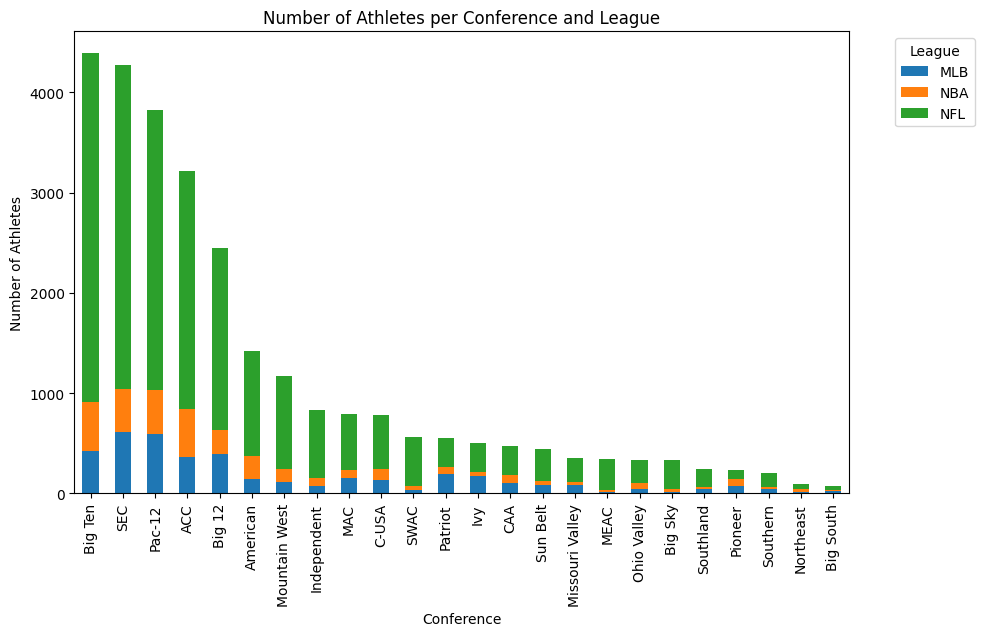

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv("AthleteDatabase.csv")

# Count the number of athletes in each conference and league
counts = df.groupby(["conference_College", "League"]).size().reset_index(name="count")

# Pivot the table to create a matrix of conference counts for each league
pivot_counts = counts.pivot(index="conference_College", columns="League", values="count")

# Sort the values by total count in descending order
total_counts = pivot_counts.sum(axis=1)
sorted_counts = total_counts.sort_values(ascending=False)
sorted_pivot_counts = pivot_counts.loc[sorted_counts.index]

# Create a stacked bar chart of the conference counts
sorted_pivot_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Conference")
plt.ylabel("Number of Athletes")
plt.title("Number of Athletes per Conference and League")
plt.legend(title="League", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=90)
plt.show()


C:\Users\brady\AppData\Local\Temp\ipykernel_5816\400667711.py:5: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.



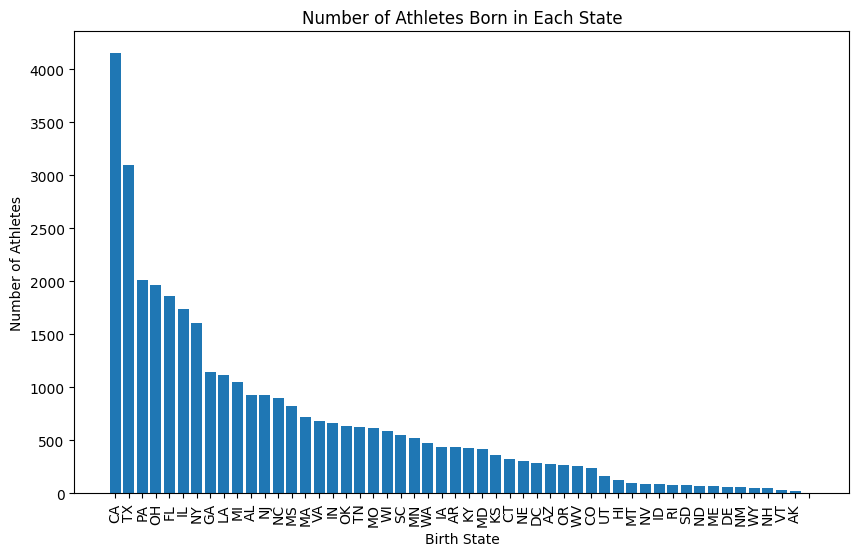

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_csv('AthleteDatabase.csv')

# Count the number of athletes born in each state
state_counts = df['BirthState'].value_counts()

# Create a bar chart of the state counts
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Birth State')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes Born in Each State')
plt.show()


C:\Users\brady\AppData\Local\Temp\ipykernel_5816\4164389530.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



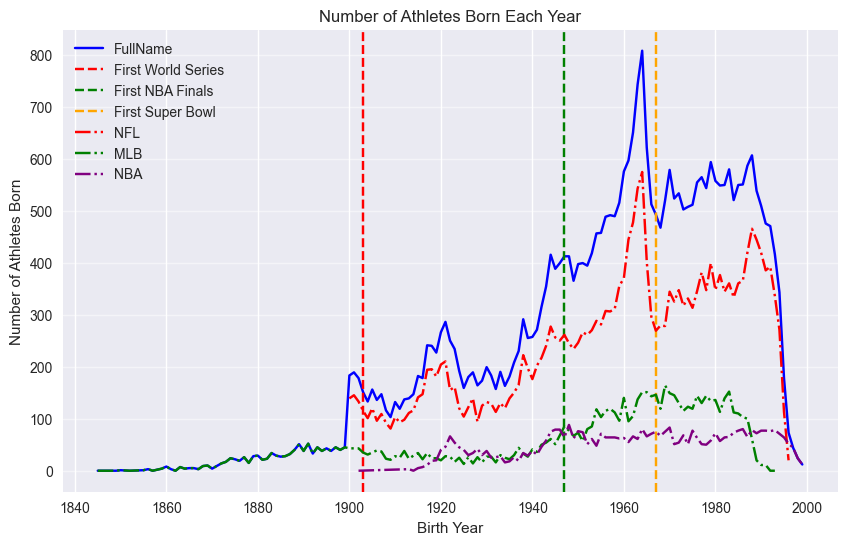

In [58]:
# Set figure size and color scheme
plt.figure(figsize=(10,6))
plt.style.use("seaborn")

# Plot the main line
birth_year_counts.plot(color="blue")

# Add markers for important events
plt.axvline(1903, color="r", linestyle="--", label="First World Series")
plt.axvline(1947, color="g", linestyle="--", label="First NBA Finals")
plt.axvline(1967, color="orange", linestyle="--", label="First Super Bowl")

# Plot the separate lines for each league
nfl_birth_years = df[df["League"] == "NFL"].groupby("Year")["FullName"].count()
nfl_birth_years.plot(color="red", linestyle="-.", label="NFL")
mlb_birth_years = df[df["League"] == "MLB"].groupby("Year")["FullName"].count()
mlb_birth_years.plot(color="green", linestyle="-.", label="MLB")
nba_birth_years = df[df["League"] == "NBA"].groupby("Year")["FullName"].count()
nba_birth_years.plot(color="purple", linestyle="-.", label="NBA")

# Set plot title and axis labels
plt.title("Number of Athletes Born Each Year")
plt.xlabel("Birth Year")
plt.ylabel("Number of Athletes Born")

# Add gridlines
plt.grid(axis="y", alpha=0.5)

# Add legend and show the plot
plt.legend()
plt.show()


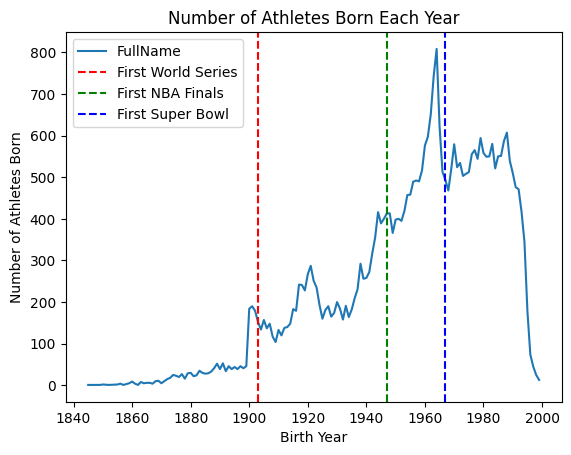

In [27]:
# Convert "BirthDay" column to datetime format
df["BirthDay"] = pd.to_datetime(df["BirthDay"])

# Create a new column "Year" to extract the year from "BirthDay"
df["Year"] = df["BirthDay"].dt.year

# Group the data by "Year" and count the number of athletes born each year
birth_year_counts = df.groupby("Year")["FullName"].count()

# Create a line plot to show the progression of athletes born each year
birth_year_counts.plot()
plt.xlabel("Birth Year")
plt.ylabel("Number of Athletes Born")
plt.title("Number of Athletes Born Each Year")

# Add markers for important events
plt.axvline(1903, color="r", linestyle="--", label="First World Series")
plt.axvline(1947, color="g", linestyle="--", label="First NBA Finals")
plt.axvline(1967, color="b", linestyle="--", label="First Super Bowl")

plt.legend()
plt.show()


In [51]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the data into a DataFrame
df = pd.read_csv('AthleteDatabase.csv')

# Create a contingency table of Conference and League
contingency_table = pd.crosstab(df['conference_College'], df['League'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-square test statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')


Chi-square test statistic: 1088.49
p-value: 0.0000


C:\Users\brady\AppData\Local\Temp\ipykernel_5816\1444661681.py:5: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.



In [53]:
import pandas as pd

# load the data
df = pd.read_csv('AthleteDatabase.csv')

# create a contingency table of Conference by League
cont_table = pd.crosstab(df['conference_College'], df['League'])

print(cont_table)


League              MLB  NBA   NFL
conference_College                
ACC                 362  480  2371
American            146  226  1048
Big 12              390  245  1809
Big Sky              18   30   286
Big South            29    8    38
Big Ten             420  487  3479
C-USA               135  107   536
CAA                 106   75   292
Independent          75   78   682
Ivy                 178   41   284
MAC                 153   79   556
MEAC                 14   20   308
Missouri Valley      86   32   239
Mountain West       119  127   921
Northeast            12   29    54
Ohio Valley          49   52   233
Pac-12              595  435  2794
Patriot             190   71   291
Pioneer              71   73    93
SEC                 617  424  3226
SWAC                 32   45   482
Southern             41   20   139
Southland            46   19   178
Sun Belt             82   42   322


C:\Users\brady\AppData\Local\Temp\ipykernel_5816\2761787905.py:4: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.



In [54]:
import pandas as pd

# load the data
df = pd.read_csv('AthleteDatabase.csv')

# create a contingency table of Conference by League
cont_table = pd.crosstab(df['BirthState'], df['League'])

print(cont_table)


League       MLB  NBA   NFL
BirthState                 
               0    4     0
AK             7    1    13
AL           139   83   709
AR            71   50   313
AZ            73   15   189
CA          1381  395  2375
CO            51   19   172
CT            85   35   202
DC            25   72   191
DE            23    9    32
FL           314  111  1441
GA           149  127   872
HI            17    2   106
IA            99   22   314
ID            17    5    69
IL           399  256  1081
IN           121  131   416
KS            86   34   247
KY            85  103   243
LA           142  118   860
MA           269   44   411
MD            99   71   246
ME            38    2    26
MI           181  150   718
MN            68   50   405
MO           159   60   398
MS           124   88   616
MT            22   10    69
NC           203  125   575
ND            12    6    52
NE            50   13   244
NH            26    1    24
NJ           165  128   637
NM            14    

C:\Users\brady\AppData\Local\Temp\ipykernel_5816\1398622326.py:4: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.



In [27]:
import pandas as pd

# load the data
df = pd.read_csv('AthleteDatabase.csv')

# create a contingency table of Conference by League
cont_table = pd.crosstab(df['College'], df['League'])

print(cont_table)


C:\Users\brady\AppData\Local\Temp\ipykernel_35792\2881760162.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AthleteDatabase.csv')


League                           MLB  NBA  NFL
College                                       
Abilene Christian University       0    0   30
Acadia University                  0    1    0
Adams State University             0    0    5
Air Force Academy                  0    0   15
Alabama - Huntsville               0    1    0
...                              ...  ...  ...
Yakima Valley Community College    3    0    0
Yale University                   26    3   23
Yankton College                    0    1    4
Yavapai College                   10    0    0
Youngstown State University        4    1   23

[1461 rows x 3 columns]


In [33]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("AthleteDatabase.csv")

# Group the data by state and count the number of athletes born in each state
state_counts = df.groupby("BirthState")["FullName"].count().reset_index()

# Create a choropleth map using Plotly Express
fig = px.choropleth(
    state_counts,
    locations="BirthState",
    locationmode="USA-states",
    color="FullName",
    scope="usa",
    title="Distribution of Athletes by Birth State",
    labels={"Name": "Number of Athletes Born"}
)

fig.write_html("athlete_map.html")

C:\Users\brady\AppData\Local\Temp\ipykernel_5816\814955688.py:5: DtypeWarning:

Columns (8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.



In [40]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("AthleteDatabase.csv")

# Group the data by birth city and count the number of athletes born in each city
city_counts = df.groupby("BirthPlace")["FullName"].count().reset_index()

# Sort the cities by number of athletes born and select the top 10 cities
top_cities = city_counts.sort_values("FullName", ascending=False).head(10)

# Create a bar chart using Plotly Express
fig = px.bar(
    top_cities,
    x="BirthPlace",
    y="FullName",
    title="Top 10 Cities with the Most Athletes Born",
    labels={"BirthPlace": "City", "Name": "Number of Athletes Born"}
)

fig.write_html("athlete_bar_chart.html")


C:\Users\brady\AppData\Local\Temp\ipykernel_5816\2155797448.py:5: DtypeWarning:

Columns (8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.



In [32]:
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv("AthleteDatabase.csv")

# Group the data by league and compute summary statistics for selected columns
summary = df.groupby("League")[["College", "BirthPlace"]].describe()

# Print the summary statistics for each league
print(summary)



       College                                       BirthPlace         \
         count unique                       top freq      count unique   
League                                                                   
MLB       7540   1028       University of Texas  107       7545   2584   
NBA       4372    477    University of Kentucky  109       4180   1599   
NFL      24459    797  University of Notre Dame  523      24104   5993   

                              
                    top freq  
League                        
MLB     Los Angeles, CA  152  
NBA         Chicago, IL  137  
NFL         Chicago, IL  474  


C:\Users\brady\AppData\Local\Temp\ipykernel_35792\3960086471.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


# Chi-Square Test

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency

# load the csv file into a pandas DataFrame
data = pd.read_csv('AthleteDatabase.csv')

# create a contingency table for each categorical variable and the target variable
cont_table_college = pd.crosstab(data['League'], data['College'])
cont_table_birthplace = pd.crosstab(data['League'], data['BirthPlace'])
cont_table_conference = pd.crosstab(data['League'], data['conference_College'])

# perform chi-square tests for each contingency table
chi2_college, p_college, dof_college, expected_college = chi2_contingency(cont_table_college)
chi2_birthplace, p_birthplace, dof_birthplace, expected_birthplace = chi2_contingency(cont_table_birthplace)
chi2_conference, p_conference, dof_conference, expected_conference = chi2_contingency(cont_table_conference)

# print the results for each chi-square test
print('Chi-square test results for College:')
print('Chi-square statistic:', chi2_college)
print('P-value:', p_college)
print('Degrees of freedom:', dof_college)
print('Expected frequencies:')
print(expected_college)

print('\nChi-square test results for BirthPlace:')
print('Chi-square statistic:', chi2_birthplace)
print('P-value:', p_birthplace)
print('Degrees of freedom:', dof_birthplace)
print('Expected frequencies:')
print(expected_birthplace)

print('\nChi-square test results for Conference:')
print('Chi-square statistic:', chi2_conference)
print('P-value:', p_conference)
print('Degrees of freedom:', dof_conference)
print('Expected frequencies:')
print(expected_conference)


C:\Users\brady\AppData\Local\Temp\ipykernel_5816\1532150789.py:5: DtypeWarning: Columns (8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('AthleteDatabase.csv')


Chi-square test results for College:
Chi-square statistic: 19392.020824927153
P-value: 0.0
Degrees of freedom: 2922
Expected frequencies:
[[6.09452208e+00 2.03150736e-01 1.01575368e+00 ... 2.03150736e+00
  5.68822060e+00 1.83241964e+02]
 [3.75378566e+00 1.25126189e-01 6.25630944e-01 ... 1.25126189e+00
  3.50353329e+00 1.12863822e+02]
 [2.01516923e+01 6.71723075e-01 3.35861538e+00 ... 6.71723075e+00
  1.88082461e+01 6.05894214e+02]]

Chi-square test results for BirthPlace:
Chi-square statistic: 20646.80399758382
P-value: 5.773282090567052e-169
Degrees of freedom: 15284
Expected frequencies:
[[0.42260293 0.63390439 0.21130146 ... 0.21130146 0.21130146 0.21130146]
 [0.23227411 0.34841116 0.11613705 ... 0.11613705 0.11613705 0.11613705]
 [1.34512296 2.01768444 0.67256148 ... 0.67256148 0.67256148 0.67256148]]

Chi-square test results for Conference:
Chi-square statistic: 1122.0219908741176
P-value: 6.309065018658897e-205
Degrees of freedom: 46
Expected frequencies:
[[ 462.8194469   204.545

### Post-Hoc between Conference and League

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Read in your data
df = pd.read_csv("AthleteDatabase.csv")

# Fit a chi-square test of independence for Conference and League
cross_tab = pd.crosstab(df['conference_College'], df['League'])
chi2, p, dof, expected = sm.stats.Table.from_cross_tab(cross_tab).test_nominal_association()

# Print chi-square test results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Conduct a post-hoc test using Tukey's HSD
posthoc = pairwise_tukeyhsd(df['League'], df['conference_College'])
print(posthoc)


C:\Users\brady\AppData\Local\Temp\ipykernel_65316\1462771783.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


AttributeError: type object 'Table' has no attribute 'from_cross_tab'

In [21]:
import pandas as pd
from scipy.stats import chi2_contingency

# assuming your data is stored in a pandas dataframe called df
conferences = df['conference_College'].unique()
leagues = df['League'].unique()

# create an empty dataframe to store the results
results = pd.DataFrame(columns=['conference_College', 'League', 'Chi-square stat', 'P-value'])

# perform chi-square test for each conference-league combination
for conf in conferences:
    for lg in leagues:
        # extract contingency table for the combination
        contingency_table = pd.crosstab(df[df['conference_College'] == conf]['League'],
                                         df[df['conference_College'] == conf]['League'])
        # perform chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        # append results to dataframe
        results = results.append({'conference_College': conf, 'League': lg, 'Chi-square stat': chi2, 'P-value': p},
                                 ignore_index=True)
        
# print results
print(results)


C:\Users\brady\AppData\Local\Temp\ipykernel_65316\2091898098.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'conference_College': conf, 'League': lg, 'Chi-square stat': chi2, 'P-value': p},
C:\Users\brady\AppData\Local\Temp\ipykernel_65316\2091898098.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'conference_College': conf, 'League': lg, 'Chi-square stat': chi2, 'P-value': p},
C:\Users\brady\AppData\Local\Temp\ipykernel_65316\2091898098.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'conference_College': conf, 'League': lg, 'Chi-square stat': chi2, 'P-value': p},


ValueError: No data; `observed` has size 0.